# Titanic: Compare Support Vector Machine to a 3 layer Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

****Data****

 * Survived: Survival (0 = No, 1 = Yes)
 * PassengerId: Id given to each traveler on the boat
 * Pclass: Ticket class. It has three possible values: 1,2,3 (first, second and third class)
 * Sex
 * Age
 * Sibsp : number of siblings and spouses traveling with the passenger
 * Parch : number of parents and children traveling with the passenger
 * Ticket: Ticket number	
 * Fare  : Passenger fare
 * Fabin : Cabin number
 * Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.describe(include =['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sirayanian, Mr. Orsen",male,347082,G6,S
freq,1,577,7,4,644


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Ticket feature may not be a correlation with survival. It contains 210 duplicates values. we may *drop ticket feature*<br>
Cabin feature may be dropped as it is *highly incomplete* or contains many null values in training.<br>
PassengerId may be dropped from training dataset *we need it during submission of project on kaggle*.<br>
Name feature is relatively non-standard, *may not contribute directly to survival*, so maybe dropped.<br>
Age of 177 people is not givenn

In [15]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
train.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


## Relationship between feature and survival 

In [17]:
PassengerId_train = train['PassengerId']
# train.drop('PassengerId', axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train['non_survived'] = 1-train['Survived']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Pclass Vs Survived

In [20]:
pd.DataFrame({'Number of people':train.groupby('Pclass').Survived.count(), 'Survived':train.groupby('Pclass').Survived.sum(), \
              'Mean':train.groupby('Pclass').Survived.mean()})

,Number of people,Survived,Mean
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


In [22]:
train.groupby('Pclass').Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [23]:
print(train.Survived.sum())
print(train.Survived.mean())

342
0.3838383838383838


#### Almost 38.38% i.e 342 people survived out of 891 poeple

In [24]:
train.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

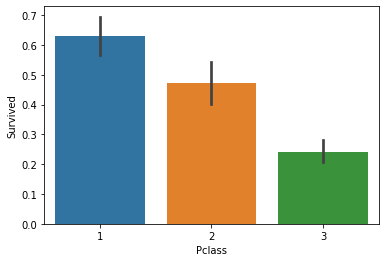

In [25]:
sns.barplot(x='Pclass', y= 'Survived', data = train)

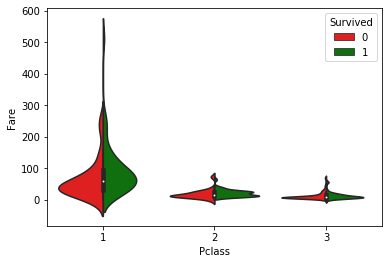

In [27]:
sns.violinplot(x= 'Pclass', y= 'Fare' , hue = 'Survived', data = train, split = True,palette={0: "r", 1: "g"})

Average fare of *Pclass 1* is high and also more people has survival chance from this class(136 people (63%)survived out of 216 people from Pclass 1 )<br>
87 people (47%) survived out of 184 people from Pclass 2 <br>
119 people (24%) survived out of 419 people from Pclass 3

### Sex Vs Survived

In [28]:
pd.DataFrame({'Number of people':train.groupby('Sex').Survived.count(), 'Survived':train.groupby('Sex').Survived.sum(), \
              'Mean':train.groupby('Sex').Survived.mean()})

,Number of people,Survived,Mean
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


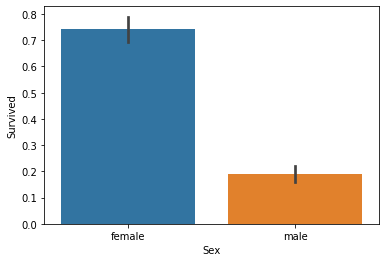

In [29]:
sns.barplot(x= 'Sex', y='Survived', data = train, order = ['female', 'male'])

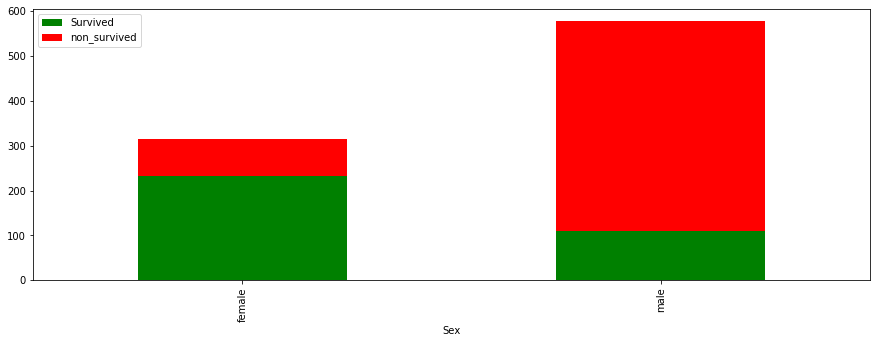

In [30]:
train.groupby('Sex').sum()[['Survived', 'non_survived']].plot(kind = 'bar', stacked = True, figsize = (15, 5),\
                                                              color = ['g', 'r'])

###### 233 female (74.2%) survived out of 314 female while only 109 male (18.8%) survived out of 577

### Sex and Pclass Vs Survived

In [31]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [32]:
pd.DataFrame({'Number of people':train.groupby(by = ['Sex', 'Pclass']).Survived.count(), 'Survived':train.groupby(by = ['Sex', 'Pclass']).Survived.sum(), \
              'Mean':train.groupby(by = ['Sex', 'Pclass']).Survived.mean()})

Number of people  Survived      Mean
Sex    Pclass                                      
female 1                     94        91  0.968085
       2                     76        70  0.921053
       3                    144        72  0.500000
male   1                    122        45  0.368852
       2                    108        17  0.157407
       3                    347        47  0.135447

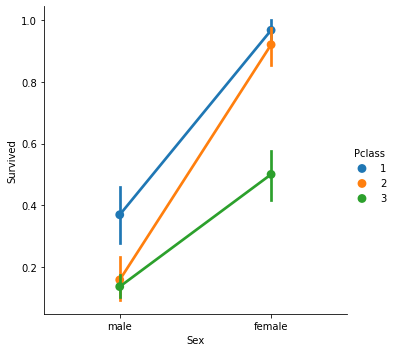

In [33]:
sns.catplot(kind= 'point', x='Sex',y='Survived', hue = 'Pclass', data = train)

Women from 1st and 2nd Pclass has more than 90% survival chance<br>
Men from Pclass 1 are more  survival chance and from class 2nd and 3rd have only around 10% survival chance

### Age Vs Survival chance

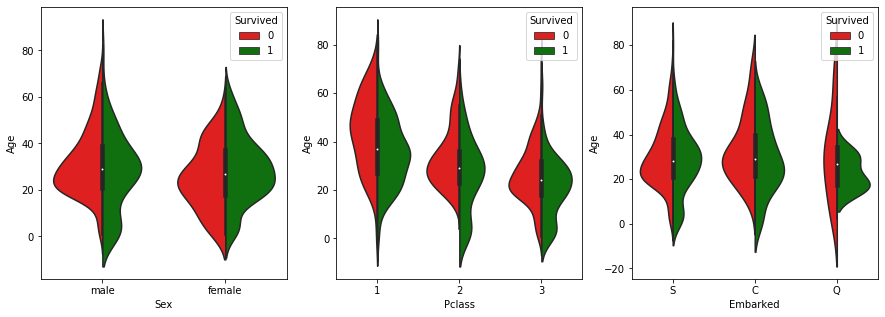

In [36]:
fig= plt.figure(figsize = (15,5))
ax1 =fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3= fig.add_subplot(133)
sns.violinplot(x= 'Sex', y= 'Age' , hue = 'Survived', data = train, split = True, ax= ax1, palette={0: "r", 1: "g"})
sns.violinplot(x= 'Pclass', y= 'Age' , hue = 'Survived', data = train, split = True, ax= ax2, palette={0: "r", 1: "g"})
sns.violinplot(x= 'Embarked', y= 'Age' , hue = 'Survived', data = train, split = True, ax= ax3, palette={0: "r", 1: "g"})

Younger male of age range 5year - 10year tend to survive as depicted by green historam
male of age range 20year-40year has more tend to die.
Women survive more than men, as depicted by the larger female green histogram

### Parch Vs Survival

In [37]:
pd.DataFrame({'Number of people':train.groupby('Parch').Survived.count(), 'Survived':train.groupby('Parch').Survived.sum(), \
              'Mean':train.groupby('Parch').Survived.mean()})

,Number of people,Survived,Mean
Parch,,,
0,678,233,0.343658
1,118,65,0.550847
2,80,40,0.500000
3,5,3,0.600000
4,4,0,0.000000
5,5,1,0.200000
6,1,0,0.000000


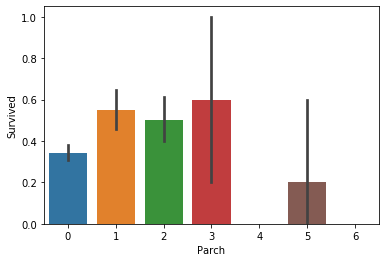

In [38]:
sns.barplot(x= 'Parch', y= 'Survived', data = train)

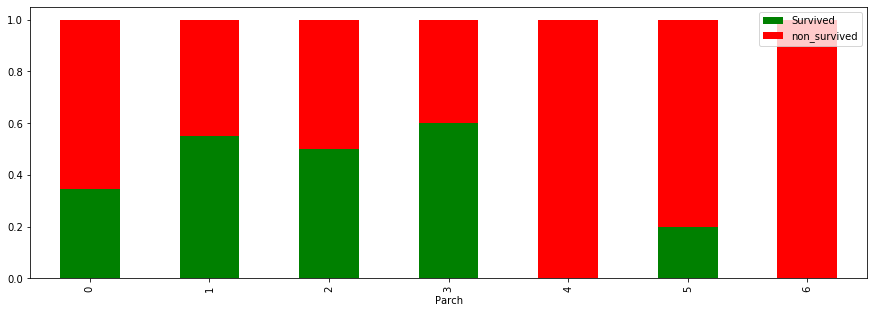

In [39]:
train.groupby('Parch')[['Survived','non_survived']].mean().plot(kind= 'bar', stacked = True, color = ('g', 'r'), figsize = (15,5))

Passenger with fmily member 1,2 and 3 has more survival chance. 

### Embarked Vs Survival

In [40]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [41]:
pd.DataFrame({'Number of people':train.groupby('Embarked').Survived.count(), 'Survived':train.groupby('Embarked').Survived.sum(), \
              'Mean':train.groupby('Embarked').Survived.mean()})

,Number of people,Survived,Mean
Embarked,,,
C,168,93,0.553571
Q,77,30,0.389610
S,644,217,0.336957


Text(0, 0.5, 'number of people')

<Figure size 432x288 with 0 Axes>

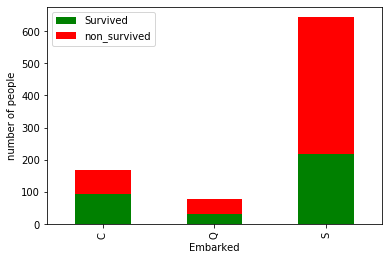

In [42]:
fig = plt.figure()
train.groupby('Embarked')['Survived', 'non_survived'].sum().plot(kind = 'bar', stacked = True, color = ('g','r'))
plt.ylabel('number of people')

More survival chance from Embarked C

### SibSp Vs Survival

In [43]:
pd.DataFrame({'Number of people':train.groupby('SibSp').Survived.count(), 'Survived':train.groupby('SibSp').Survived.sum(), \
              'Mean':train.groupby('SibSp').Survived.mean()})

,Number of people,Survived,Mean
SibSp,,,
0,608,210,0.345395
1,209,112,0.535885
2,28,13,0.464286
3,16,4,0.250000
4,18,3,0.166667
5,5,0,0.000000
8,7,0,0.000000


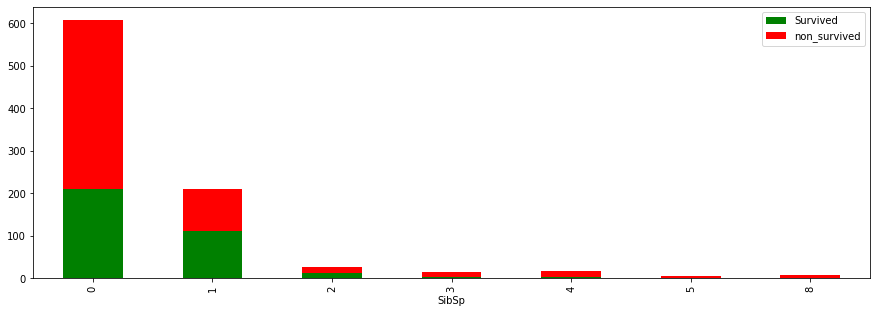

In [44]:
train.groupby('SibSp')['Survived', 'non_survived'].sum().plot(kind= 'bar', stacked = True, color = ('g','r'), figsize = (15,5))

people with less siblings has more survival chance

## Feature Extraction

select the appropriate features totrain our classifier.

Combine train and test data 

In [46]:
train_test=[train , test]
data = pd.concat(train_test, sort = False)

In [48]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [50]:
data.shape # includes train and test dataset

(1309, 13)

### Name 

Extract title from each name that can give additional information about the social status 

In [51]:
data['title'] = data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,Mr


In [52]:
Titles = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty",
    "Dona": "Master"
}

In [53]:
data['title'] = data.title.apply(lambda x: Titles[x])

In [54]:
data['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [55]:
Title_map = {'Mr': 0,
             'Mrs':1,
             'Miss': 2,
             'Master':3,
             'Royalty':4,
             'Officer':5}

In [56]:
data['title'] = data.title.apply(lambda x: Title_map[x])

In [57]:
data['title'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [58]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0


### Sex feature

In [59]:
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### Age

In [60]:
age_mean = data['Age'].mean()

In [61]:
data['Age'].fillna(age_mean , inplace = True)

### SibSp	Parch

In [62]:
data['Family_size'] = data["SibSp"]+data["Parch"] +1

In [63]:
data.groupby(by = ['Family_size'], as_index= False).Survived.mean()

,Family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


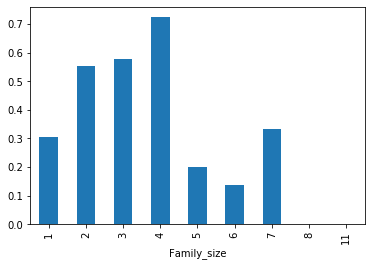

In [64]:
data.groupby(by = ['Family_size']).Survived.mean().plot(kind = 'bar')

Family size with 2, 3 and 4 member has more survival chance<br>
convert fami;y in 3 group
 * sigleton
 * smallfamily
 * largefamily

In [65]:
Family = []
for FamilySize in data['Family_size']:
    if FamilySize==1:
        Family.append(0)
    elif (2 <= FamilySize <= 4):
        Family.append(1)
    elif ( 5<=FamilySize):
        Family.append(2)


In [66]:
data["Family"] = pd.Series(Family)

In [67]:
data.drop(['SibSp', 'Parch', 'Family_size'], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,non_survived,title,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,A/5 21171,7.2500,NaN,S,1.0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,PC 17599,71.2833,C85,C,0.0,1,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,STON/O2. 3101282,7.9250,NaN,S,0.0,2,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,113803,53.1000,C123,S,0.0,1,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,373450,8.0500,NaN,S,1.0,0,0
5,6,0.0,3,"Moran, Mr. James",0,29.881138,330877,8.4583,NaN,Q,1.0,0,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.000000,17463,51.8625,E46,S,1.0,0,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.000000,349909,21.0750,NaN,S,1.0,3,2
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,347742,11.1333,NaN,S,0.0,1,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,237736,30.0708,NaN,C,0.0,1,1


### Fare 

In [68]:
data.Fare.isnull().sum()

1

One null value is presence in Fare

In [70]:
data['Fare'] = data['Fare'].fillna(train['Fare'].median())

In [71]:
data.Fare.isnull().sum()

0

In [72]:
data['Fare'].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

Mean value of Fare is  aprox. 33 and 75% of fare is 31.2 <br>
convert fare in group
 * fare <=7.89
 * 7.89< fare<= 14.5
 * 14.5< fare <= 31
 * 31< fare

In [74]:
data['Fare'].dtype

dtype('float64')

In [75]:
fare = []
for fares in data['Fare']:
    if fares<=7.89:
        fare.append(0)
    elif (7.89 <= fares <= 14.5):
        fare.append(1)
    elif ( 14.5< fares<=31):
        fare.append(2)
    elif (31<=fares):
        fare.append(3)
   

In [76]:
data['Fare_data'] = pd.Series(fare)

In [77]:
data.drop('Fare', axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,non_survived,title,Family_size,Family,Fare_data
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,NaN,S,1.0,0,2,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,C85,C,0.0,1,2,1,3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,NaN,S,0.0,2,1,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,C123,S,0.0,1,2,1,3
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,NaN,S,1.0,0,1,0,1
5,6,0.0,3,"Moran, Mr. James",0,29.881138,0,0,330877,NaN,Q,1.0,0,1,0,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,E46,S,1.0,0,1,0,3
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,NaN,S,1.0,3,5,2,2
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,NaN,S,0.0,1,3,1,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,NaN,C,0.0,1,2,1,2


### Embarked

In [78]:
data.Embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [79]:
data.Embarked.isnull().sum()

2

In [80]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Fill 2 null Embarked value with most frequent valu **S** 

In [81]:
data['Embarked'].fillna('S', inplace = True)

In [82]:
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q':2})

In [83]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived,title,Family_size,Family,Fare_data
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1.0,0,2,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0.0,1,2,1,3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0.0,2,1,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0.0,1,2,1,3
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1.0,0,1,0,1


In [84]:
data.shape

(1309, 17)

data includes both train and test set, we need to sepereate train and test data. our train data is 891 and rest 418 is test data

## Feature selections

In [85]:
train_feature = data[:891]

In [86]:
test_feature = data[891:]

In [87]:
train.shape, test.shape, train_feature.shape, test_feature.shape

((891, 13), (418, 11), (891, 17), (418, 17))

In [88]:
train_feature.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived,title,Family_size,Family,Fare_data
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1.0,0,2,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0.0,1,2,1,3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0.0,2,1,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0.0,1,2,1,3
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1.0,0,1,0,1


In [89]:
test_feature.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,non_survived,title,Family_size,Family,Fare_data
0,892,NaN,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,NaN,0,1,1,0
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,NaN,1,2,1,3
2,894,NaN,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,NaN,0,1,0,1
3,895,NaN,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,NaN,0,1,1,3
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,NaN,1,3,0,1


#### Train data

In [90]:
data = train_feature.drop(['PassengerId','Name','Ticket','Fare', 'Cabin','non_survived', 'Family_size'], axis = 1)

In [91]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,title,Family,Fare_data
0,0.0,3,0,22.0,1,0,0,0,1,0
1,1.0,1,1,38.0,1,0,1,1,1,3
2,1.0,3,1,26.0,0,0,0,2,0,1
3,1.0,1,1,35.0,1,0,0,1,1,3
4,0.0,3,0,35.0,0,0,0,0,0,1


In [92]:
y = data['Survived']
X = data.drop(['Survived'], axis =1)

In [93]:
X.shape, y.shape

((891, 9), (891,))

In [94]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,title,Family,Fare_data
0,3,0,22.0,1,0,0,0,1,0
1,1,1,38.0,1,0,1,1,1,3
2,3,1,26.0,0,0,0,2,0,1
3,1,1,35.0,1,0,0,1,1,3
4,3,0,35.0,0,0,0,0,0,1


In [95]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

#### Test data

In [96]:
test_data = test_feature.drop(['PassengerId','Name','Ticket','Fare','Survived', 'Cabin','non_survived','Family_size'], axis = 1)

In [97]:
test_data.shape

(418, 9)

In [98]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,title,Family,Fare_data
0,3,0,34.5,0,0,2,0,1,0
1,3,1,47.0,1,0,0,1,1,3
2,2,0,62.0,0,0,2,0,0,1
3,3,0,27.0,0,0,0,0,1,3
4,3,1,22.0,1,1,0,1,0,1


# Modeling 

In [99]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1,random_state=4)

In [103]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((801, 9), (90, 9), (801,), (90,))

### SVM 

In [104]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
y_pred_svm= svm_clf.predict(X_test)
y_pred_svm

C:\Users\04rit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1.])

In [105]:
acc_svc = svm_clf.score(X_test, y_test) 
print (acc_svc)

0.8888888888888888


In [106]:
from sklearn.metrics import accuracy_score
Accuracy_svm = accuracy_score(y_test,y_pred_svm)
print("Accuracy:", Accuracy_svm)

Accuracy: 0.8888888888888888


## Neural network 

In [108]:
import tensorflow as tf

In [109]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import regularizers

Using TensorFlow backend.


In [110]:
classifier = Sequential()
#First hidden layer
classifier.add(Dense(8, activation='relu', kernel_initializer='uniform', input_dim=9))
#second hidden layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
#Output Layer/ third layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

W0810 04:26:27.877434  3144 deprecation_wrapper.py:119] From C:\Users\04rit\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 04:26:27.915410  3144 deprecation_wrapper.py:119] From C:\Users\04rit\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 04:26:27.920408  3144 deprecation_wrapper.py:119] From C:\Users\04rit\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 04:26:27.951401  3144 deprecation_wrapper.py:119] From C:\Users\04rit\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [111]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

W0810 04:26:28.124290  3144 deprecation_wrapper.py:119] From C:\Users\04rit\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 04:26:28.230230  3144 deprecation_wrapper.py:119] From C:\Users\04rit\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0810 04:26:28.246225  3144 deprecation.py:323] From C:\Users\04rit\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [112]:
classifier.fit(X_train, y_train, batch_size=10, epochs=500)

Epoch 1/500
801/801 [==============================] - 1s 948us/step - loss: 0.6862 - acc: 0.6017
Epoch 2/500
801/801 [==============================] - 0s 272us/step - loss: 0.6627 - acc: 0.6067
Epoch 3/500
801/801 [==============================] - 0s 257us/step - loss: 0.6301 - acc: 0.6517
Epoch 4/500
801/801 [==============================] - 0s 237us/step - loss: 0.5748 - acc: 0.7341
Epoch 5/500
801/801 [==============================] - 0s 248us/step - loss: 0.5198 - acc: 0.7478
Epoch 6/500
801/801 [==============================] - 0s 223us/step - loss: 0.4998 - acc: 0.7665
Epoch 7/500
801/801 [==============================] - 0s 216us/step - loss: 0.4841 - acc: 0.7678
Epoch 8/500
801/801 [==============================] - 0s 188us/step - loss: 0.4806 - acc: 0.7790
Epoch 9/500
801/801 [==============================] - 0s 236us/step - loss: 0.4750 - acc: 0.7853
Epoch 10/500
801/801 [==============================] - 0s 198us/step - loss: 0.4633 - acc: 0.7928
Epoch 11/500
801/80

801/801 [==============================] - 0s 271us/step - loss: 0.4223 - acc: 0.8152
Epoch 84/500
801/801 [==============================] - 0s 195us/step - loss: 0.4143 - acc: 0.8227
Epoch 85/500
801/801 [==============================] - 0s 196us/step - loss: 0.4175 - acc: 0.8127
Epoch 86/500
801/801 [==============================] - 0s 222us/step - loss: 0.4215 - acc: 0.8152
Epoch 87/500
801/801 [==============================] - 0s 222us/step - loss: 0.4138 - acc: 0.8240
Epoch 88/500
801/801 [==============================] - 0s 191us/step - loss: 0.4112 - acc: 0.8177
Epoch 89/500
801/801 [==============================] - 0s 231us/step - loss: 0.4151 - acc: 0.8202
Epoch 90/500
801/801 [==============================] - 0s 217us/step - loss: 0.4173 - acc: 0.8190
Epoch 91/500
801/801 [==============================] - 0s 218us/step - loss: 0.4127 - acc: 0.8165
Epoch 92/500
801/801 [==============================] - 0s 231us/step - loss: 0.4126 - acc: 0.8127
Epoch 93/500
801/801 [=

801/801 [==============================] - 0s 198us/step - loss: 0.4041 - acc: 0.8240
Epoch 165/500
801/801 [==============================] - 0s 226us/step - loss: 0.4032 - acc: 0.8302
Epoch 166/500
801/801 [==============================] - 0s 203us/step - loss: 0.4068 - acc: 0.8302
Epoch 167/500
801/801 [==============================] - 0s 210us/step - loss: 0.4061 - acc: 0.8215
Epoch 168/500
801/801 [==============================] - 0s 182us/step - loss: 0.4039 - acc: 0.8290
Epoch 169/500
801/801 [==============================] - 0s 217us/step - loss: 0.4020 - acc: 0.8265
Epoch 170/500
801/801 [==============================] - 0s 190us/step - loss: 0.4019 - acc: 0.8252
Epoch 171/500
801/801 [==============================] - 0s 215us/step - loss: 0.4043 - acc: 0.8240
Epoch 172/500
801/801 [==============================] - 0s 182us/step - loss: 0.4051 - acc: 0.8240
Epoch 173/500
801/801 [==============================] - 0s 183us/step - loss: 0.4068 - acc: 0.8290
Epoch 174/500


801/801 [==============================] - 0s 193us/step - loss: 0.4000 - acc: 0.8252
Epoch 246/500
801/801 [==============================] - 0s 211us/step - loss: 0.3997 - acc: 0.8252
Epoch 247/500
801/801 [==============================] - 0s 187us/step - loss: 0.3980 - acc: 0.8265
Epoch 248/500
801/801 [==============================] - 0s 183us/step - loss: 0.4011 - acc: 0.8290
Epoch 249/500
801/801 [==============================] - 0s 187us/step - loss: 0.3983 - acc: 0.8327
Epoch 250/500
801/801 [==============================] - 0s 226us/step - loss: 0.4002 - acc: 0.8227
Epoch 251/500
801/801 [==============================] - 0s 247us/step - loss: 0.3994 - acc: 0.8277
Epoch 252/500
801/801 [==============================] - 0s 282us/step - loss: 0.3971 - acc: 0.8315
Epoch 253/500
801/801 [==============================] - 0s 228us/step - loss: 0.4005 - acc: 0.8215
Epoch 254/500
801/801 [==============================] - 0s 206us/step - loss: 0.4003 - acc: 0.8315
Epoch 255/500


801/801 [==============================] - 0s 216us/step - loss: 0.4022 - acc: 0.8290
Epoch 326/500
801/801 [==============================] - 0s 246us/step - loss: 0.3979 - acc: 0.8315
Epoch 327/500
801/801 [==============================] - 0s 241us/step - loss: 0.3986 - acc: 0.8177
Epoch 328/500
801/801 [==============================] - 0s 231us/step - loss: 0.3958 - acc: 0.8327
Epoch 329/500
801/801 [==============================] - 0s 227us/step - loss: 0.3959 - acc: 0.8327
Epoch 330/500
801/801 [==============================] - 0s 236us/step - loss: 0.4022 - acc: 0.8290
Epoch 331/500
801/801 [==============================] - 0s 235us/step - loss: 0.3948 - acc: 0.8315
Epoch 332/500
801/801 [==============================] - 0s 280us/step - loss: 0.3967 - acc: 0.8227
Epoch 333/500
801/801 [==============================] - 0s 238us/step - loss: 0.3969 - acc: 0.8252
Epoch 334/500
801/801 [==============================] - 0s 240us/step - loss: 0.3963 - acc: 0.8252
Epoch 335/500


801/801 [==============================] - 0s 226us/step - loss: 0.3954 - acc: 0.8277
Epoch 407/500
801/801 [==============================] - 0s 192us/step - loss: 0.3955 - acc: 0.8302
Epoch 408/500
801/801 [==============================] - 0s 212us/step - loss: 0.3936 - acc: 0.8315
Epoch 409/500
801/801 [==============================] - 0s 208us/step - loss: 0.3951 - acc: 0.8277
Epoch 410/500
801/801 [==============================] - 0s 185us/step - loss: 0.3980 - acc: 0.8265
Epoch 411/500
801/801 [==============================] - 0s 185us/step - loss: 0.3957 - acc: 0.8340
Epoch 412/500
801/801 [==============================] - 0s 183us/step - loss: 0.3945 - acc: 0.8315
Epoch 413/500
801/801 [==============================] - 0s 220us/step - loss: 0.3939 - acc: 0.8265
Epoch 414/500
801/801 [==============================] - 0s 201us/step - loss: 0.3952 - acc: 0.8202
Epoch 415/500
801/801 [==============================] - 0s 212us/step - loss: 0.3940 - acc: 0.8302
Epoch 416/500


801/801 [==============================] - 0s 190us/step - loss: 0.3929 - acc: 0.8352
Epoch 489/500
801/801 [==============================] - 0s 186us/step - loss: 0.3940 - acc: 0.8302
Epoch 490/500
801/801 [==============================] - 0s 222us/step - loss: 0.3946 - acc: 0.8227
Epoch 491/500
801/801 [==============================] - 0s 192us/step - loss: 0.3920 - acc: 0.8315
Epoch 492/500
801/801 [==============================] - 0s 185us/step - loss: 0.3943 - acc: 0.8227
Epoch 493/500
801/801 [==============================] - 0s 196us/step - loss: 0.3960 - acc: 0.8240
Epoch 494/500
801/801 [==============================] - 0s 182us/step - loss: 0.3926 - acc: 0.8227
Epoch 495/500
801/801 [==============================] - 0s 190us/step - loss: 0.3899 - acc: 0.8352
Epoch 496/500
801/801 [==============================] - 0s 193us/step - loss: 0.3951 - acc: 0.8290
Epoch 497/500
801/801 [==============================] - 0s 210us/step - loss: 0.3913 - acc: 0.8252
Epoch 498/500


In [113]:
classifier.evaluate(X_train, y_train)

801/801 [==============================] - 0s 105us/step


[0.3889216795359063, 0.8314606741573034]

In [114]:
y_pred= classifier.predict(X_test)
y_pred = (y_pred>0.5).astype(int).reshape(X_test.shape[0])

In [115]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1])

In [118]:
pd.DataFrame({'Actual_survived': y_test, 'Predicted_survived':y_pred }).head()

,Actual_survived,Predicted_survived
646,0.0,0
876,0.0,0
359,1.0,1
194,1.0,1
819,0.0,0


In [117]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", Accuracy)

Accuracy: 0.8777777777777778
